In [38]:
df1

,Unnamed: 0,max_freq,window_length,quantile_range_baz_snell_nonfixed,quantile_range_slow_snell_nonfixed,strike_fit,dip_fit,v_oceanic_fit,v_continental_fit
0,0,20,4.0,32.991552,0.101512,281.542310,23.576732,8.400000,5.800000
1,1,14,4.0,30.727949,0.097486,289.148497,25.600985,8.400000,5.800000
2,2,10,4.0,31.402516,0.105647,289.748050,25.501805,8.400000,5.800000
3,3,8,4.0,32.855064,0.096978,290.653679,25.571320,8.400000,5.800000
4,4,6,4.0,31.753443,0.104652,290.143876,25.832160,8.400000,5.800000
5,5,20,3.0,33.126892,0.096303,286.485982,27.498670,8.400000,5.800000
6,6,14,3.0,29.876112,0.088514,281.888358,26.616399,8.400000,5.800000
7,7,10,3.0,29.088468,0.104783,281.631341,26.638123,8.400000,5.800000
8,8,8,3.0,28.008912,0.101481,282.232423,26.576079,8.400000,5.800000
9,9,6,3.0,26.077296,0.111066,281.564544,26.745154,8.400000,5.800000


In [2]:
import numpy as np
np.random.rand()


0.7872408191966764

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

array = 'POM' #2A, 3A, POM
analysis = 'lts' #lts, fk
timing = 'half' #start, quarter, half
correction = 'snell_nonfixed' #nothing, niazi_nonfixed, niazi_fixed,snell_fixed, snell_nonfixed, linear

df1 = pd.read_csv('/Users/cadequigley/Downloads/Research/paper_figures/quantiles/'+array+'_'+correction+'_'+analysis+'_'+timing+'.csv')
grid_plot(df1, y_variable = 'baz') #baz, slow

NameError: name 'grid_plot' is not defined

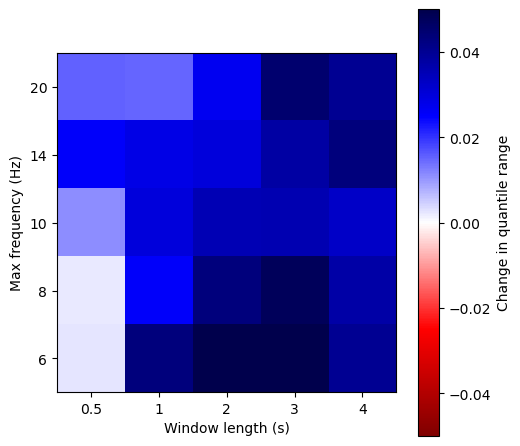

In [26]:
y_variable = 'slow' #baz, slow
grid_plot_difference(df1, y_variable, array, correction, analysis, timing)

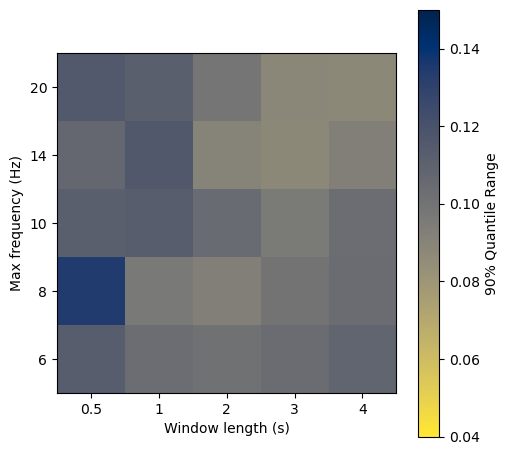

In [2]:
def grid_plot(df1, y_variable = 'slow'):
    y_variable = y_variable #slow
    import matplotlib.pyplot as plt
    import numpy as np
#titles = ['Array 2A FK Analysis','Array 2A LTS Analysis']
#ls_titles = ['Array 2A LS Analysis']



    if y_variable == 'baz':
        cmap = 'inferno_r'
        vmin = 20 #10
        vmax = 75 #50
    else: 
        cmap = 'cividis_r'
        vmin = 0.04
        vmax = 0.15

     #Blues_r
#data = [df6,df4]
    fig, ax = plt.subplots(figsize = (5,5))

    # SET UP FK-----------------------------------------------
    x1 = pd.DataFrame(df1[df1['max_freq']== 20])
    x1 = x1.sort_values(by='window_length')
    x1 = x1['quantile_range_'+y_variable+'_'+correction].to_numpy()
    x2 = pd.DataFrame(df1[df1['max_freq']== 14])
    x2 = x2.sort_values(by='window_length')
    x2 = x2['quantile_range_'+y_variable+'_'+correction].to_numpy()
    x3 = pd.DataFrame(df1[df1['max_freq']== 10])
    x3 = x3.sort_values(by='window_length')
    x3 = x3['quantile_range_'+y_variable+'_'+correction].to_numpy()
    x4 = pd.DataFrame(df1[df1['max_freq']== 8])
    x4 = x4.sort_values(by='window_length')
    x4 = x4['quantile_range_'+y_variable+'_'+correction].to_numpy()
    x5 = pd.DataFrame(df1[df1['max_freq']== 6])
    x5 = x5.sort_values(by='window_length')
    x5 = x5['quantile_range_'+y_variable+'_'+correction].to_numpy()

    Z1 = np.array([x5,x4,x3,x2,x1])
    
    #SET UP LS PLOTTING-------------------------------------------------
    im1 = ax.imshow(Z1, cmap = cmap, vmin= vmin,vmax =vmax, origin = 'lower') #inferno
    ax.set_xticks([0,1,2,3,4])
    ax.set_xticklabels(['0.5', '1', '2', '3', '4'])
    ax.set_yticks([0,1,2,3,4])
    ax.set_yticklabels(['6', '8', '10', '14', '20'])
    ax.set_xlabel('Window length (s)')
    ax.set_ylabel('Max frequency (Hz)')

    plt.tight_layout()
    fig.colorbar(im1, ax=ax, orientation='vertical', label='90% Quantile Range')
    return plt.show()
    
grid_plot(df1, y_variable = 'slow')

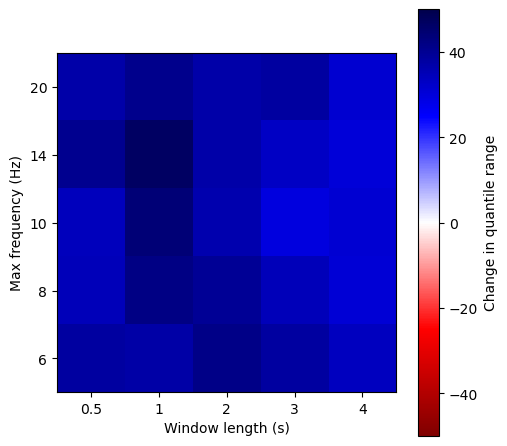

In [3]:
def grid_plot_difference(df1, y_variable, array, correction, analysis, timing ):
    import matplotlib.pyplot as plt
    import numpy as np
    
    
    #Pull in data with no correction
    #correction = 'nothing' #niazi_nonfixed, niazi_fixed,snell_fixed, snell_nonfixed, linear
    df = pd.read_csv('/Users/cadequigley/Downloads/Research/paper_figures/quantiles/'+array+'_'+'nothing'+'_'+analysis+'_'+timing+'.csv')
    
    df1 = df1.merge(
        df,
        on=["max_freq", "window_length"],
        how="inner"   # or "left", "right", "outer" 
    )
    #print(df1)
    if correction == 'nothing':
        df1['difference'] = df1['quantile_range_'+y_variable+'_nothing_x'] - df1['quantile_range_'+y_variable+'_'+correction+'_y']
    else:
        df1['difference'] = df1['quantile_range_'+y_variable+'_nothing'] - df1['quantile_range_'+y_variable+'_'+correction]


    if y_variable == 'baz':
        vmin = -50 #10
        vmax = 50 #50
    else: 
        vmin = -0.05
        vmax = 0.05

    cmap = 'seismic_r' #Blues_r
#data = [df6,df4]
    fig, ax = plt.subplots(figsize = (5,5))

    # SET UP FK-----------------------------------------------
    x1 = pd.DataFrame(df1[df1['max_freq']== 20])
    x1 = x1.sort_values(by='window_length')
    x1 = x1['difference'].to_numpy()
    x2 = pd.DataFrame(df1[df1['max_freq']== 14])
    x2 = x2.sort_values(by='window_length')
    x2 = x2['difference'].to_numpy()
    x3 = pd.DataFrame(df1[df1['max_freq']== 10])
    x3 = x3.sort_values(by='window_length')
    x3 = x3['difference'].to_numpy()
    x4 = pd.DataFrame(df1[df1['max_freq']== 8])
    x4 = x4.sort_values(by='window_length')
    x4 = x4['difference'].to_numpy()
    x5 = pd.DataFrame(df1[df1['max_freq']== 6])
    x5 = x5.sort_values(by='window_length')
    x5 = x5['difference'].to_numpy()

    Z1 = np.array([x5,x4,x3,x2,x1])
    
    #SET UP LS PLOTTING-------------------------------------------------
    im1 = ax.imshow(Z1, cmap = cmap, vmin= vmin,vmax =vmax, origin = 'lower') #inferno
    ax.set_xticks([0,1,2,3,4])
    ax.set_xticklabels(['0.5', '1', '2', '3', '4'])
    ax.set_yticks([0,1,2,3,4])
    ax.set_yticklabels(['6', '8', '10', '14', '20'])
    ax.set_xlabel('Window length (s)')
    ax.set_ylabel('Max frequency (Hz)')

    plt.tight_layout()
    fig.colorbar(im1, ax=ax, orientation='vertical', label='Change in quantile range')
    return plt.show()

y_variable = 'baz'
grid_plot_difference(df1, y_variable, array, correction, analysis, timing)